In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [110]:
file_path = r"C:\Valeriia\py-adult-data-analysis\data\adult.csv"
data = pd.read_csv(file_path, index_col=[0])
data.replace("?", np.nan)
data.dropna()
print(data.loc[(data['salary'] == '>50K') & (data['salary K$'] <= 50)])
print(data.loc[(data['salary'] == '<=50K') & (data['salary K$'] > 50)])

Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []


# Task 1
Print the count of men and women in the dataset.

In [18]:
men_count = data[data["sex"] == "Male"].shape[0]
women_count = data[data["sex"] == "Female"].shape[0]

print("Count of men:", men_count)
print("Count of women:", women_count)

Count of men: 21790
Count of women: 10771


# Task 2
Find the average age of men in dataset

In [21]:
men = data[data["sex"] == "Male"]
men["age"].mean().round()

39.0

# Task 3
Get the percentage of people from Poland (native-country)

In [27]:
people = data[data["native-country"] == "Poland"].shape[0] * 100 / data.shape[0]
print(f"Percentage of people from Poland: {people:.2f}%")

Percentage of people from Poland: 0.18%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [113]:
result = data.groupby('salary')['age'].agg(['mean', 'std']).round(2).reset_index()
result

,salary,mean,std
0,<=50K,36.78,14.02
1,>50K,44.25,10.52


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [38]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
higher_salary[~higher_salary["education"].isin(higher_education)].shape[0]

3306

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [44]:
data.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

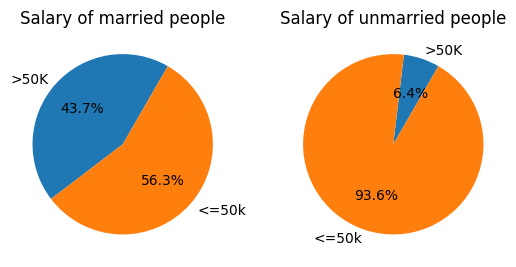

In [56]:
married = data[data["marital-status"].str.startswith("Married")]
unmarried = data[~data["marital-status"].str.startswith("Married")]
married_high_salary = married[married["salary"] == ">50K"].shape[0] * 100 / married.shape[0]
unmarried_high_salary = unmarried[unmarried["salary"] == ">50K"].shape[0] * 100 / unmarried.shape[0]

plt.subplot(1, 2, 1)
labels_1 = [">50K", "<=50k"]
people_share_1 = [married_high_salary, 100 - married_high_salary]
plt.pie(people_share_1, labels=labels_1, autopct="%1.1f%%", startangle=60)
plt.title("Salary of married people")

plt.subplot(1, 2, 2)
labels_2 = [">50K", "<=50k"]
people_share_2 = [unmarried_high_salary, 100 - unmarried_high_salary]
plt.pie(people_share_2, labels=labels_2, autopct="%1.1f%%", startangle=60)
plt.title("Salary of unmarried people")

plt.show()

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [67]:
max_hours = data["hours-per-week"].max()
print(f"Max hours per week some person works - {max_hours}")
data.groupby("hours-per-week").size()

Max hours per week some person works - 99


hours-per-week
1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Length: 94, dtype: int64

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [108]:
data["marital-status"] = data["marital-status"].replace({"^Married.*": 1, ".*": 0}, regex=True)
data["sex"] = data["sex"].replace({"Female": 1, "Male": 0}, regex=True)
selected_columns = ["age", "marital-status", "sex", "hours-per-week", "salary K$"]
correlation_matrix = data[selected_columns].corr()
print("There is a weak dependence between the indicators.\n"
      "The most independent variables are hours-per-week and age.\n"
      "There is a positive correlation of 0.37 between marital-status and salary\n"
      "This may indicate higher wages for married people")
correlation_matrix

There is a weak dependence between the indicators.
The most independent variables are hours-per-week and age.
There is a positive correlation of 0.37 between marital-status and salary
This may indicate higher wages for married people


,age,marital-status,sex,hours-per-week,salary K$
age,1.000000,0.318239,-0.088832,0.068756,0.201774
marital-status,0.318239,1.000000,-0.421465,0.210912,0.374539
sex,-0.088832,-0.421465,1.000000,-0.229309,-0.182528
hours-per-week,0.068756,0.210912,-0.229309,1.000000,0.196916
salary K$,0.201774,0.374539,-0.182528,0.196916,1.000000
